### case1: Activation fuction ReLU after BN - Observation: Validation accuracy(99.48%) has almost no impact.

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

Using TensorFlow backend.


In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


(60000, 28, 28)


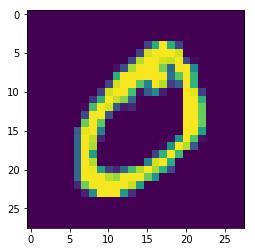

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[1])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
print('X_train shape:', X_train.shape)
print('Number of images in X_train', X_train.shape[0])
print('Number of images in X_test', X_test.shape[0])

X_train shape: (60000, 28, 28, 1)
Number of images in X_train 60000
Number of images in X_test 10000


In [0]:
y_train[:10]
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
from keras.regularizers import l2
model = Sequential()
 
model.add(Convolution2D(16, 3, 3,kernel_regularizer=l2(0.01), input_shape=(28,28,1))) #26
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(32, 3, 3, kernel_regularizer=l2(0.01),)) #24
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, 1,kernel_regularizer=l2(0.01))) #22
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))#11

model.add(Convolution2D(16, 3, 3,kernel_regularizer=l2(0.01)))#9
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3,kernel_regularizer=l2(0.01)))#7
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3,kernel_regularizer=l2(0.01)))#5
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3,kernel_regularizer=l2(0.01)))#3
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(10, 4, 4,kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg..., input_shape=(28, 28, 1...)`
  """


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), kernel_regularizer=<keras.reg...)`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), kernel_regularizer=<keras.reg...)`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg...)`
/usr/local

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 32)        0         
__________

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])



In [0]:
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator

# create generator that centers pixel values
train_datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
test_datagen = ImageDataGenerator()
train_set= train_datagen.flow(X_train, Y_train, batch_size=64)
test_set= train_datagen.flow(X_test, Y_test, batch_size=64)

model.fit_generator(train_set, 
                         steps_per_epoch=60000//64, 
                         validation_data= test_set, 
                         validation_steps=10000//64, 
                         epochs=40)

                                 
                   

Instructions for updating:
Use tf.cast instead.
Epoch 1/40


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:699: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:707: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


937/937 [==============================] - 16s 17ms/step - loss: 0.8178 - acc: 0.8446 - val_loss: 0.3555 - val_acc: 0.9627
Epoch 2/40
937/937 [==============================] - 13s 13ms/step - loss: 0.5531 - acc: 0.8642 - val_loss: 0.6174 - val_acc: 0.8677
Epoch 3/40
937/937 [==============================] - 14s 15ms/step - loss: 0.5490 - acc: 0.8671 - val_loss: 0.3577 - val_acc: 0.9550
Epoch 4/40
937/937 [==============================] - 13s 13ms/step - loss: 0.5455 - acc: 0.8679 - val_loss: 0.7860 - val_acc: 0.8235
Epoch 5/40
937/937 [==============================] - 13s 13ms/step - loss: 0.5501 - acc: 0.8678 - val_loss: 0.2534 - val_acc: 0.9815
Epoch 6/40
937/937 [==============================] - 13s 13ms/step - loss: 0.5344 - acc: 0.8698 - val_loss: 0.2464 - val_acc: 0.9774
Epoch 7/40
937/937 [==============================] - 13s 13ms/step - loss: 0.5390 - acc: 0.8692 - val_loss: 0.3766 - val_acc: 0.9390
Epoch 8/40
937/937 [==============================] - 13s 13ms/step - los

In [0]:

score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.21949351046085358, 0.9746]


Actual digit is [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]] predicted [3.1973154e-04 3.1973154e-04 3.1973154e-04 3.1973154e-04 9.9712235e-01
 3.1973154e-04 3.1973154e-04 3.1973154e-04 3.1973154e-04 3.1973154e-04]


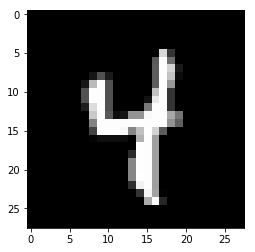

In [0]:
def randIm():
    i = np.random.choice(np.arange(0, len(Y_test)), size = (1,))
    pred = model.predict(X_test[i])
    image = (X_test[i].reshape(28, 28))
    # show the prediction
    print ("Actual digit is", Y_test[i], "predicted", pred[0])
    imgplot = plt.imshow(image)
    imgplot.set_cmap('gray')   

randIm()